In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import pytesseract
# from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image
import deepdoctection as dd
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
# from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
import cv2 
from pathlib import Path
import os
from IPython.core.display import HTML
from bs4 import BeautifulSoup
import tkinter as tk
from tkinter import filedialog
import io
import os
from IPython.display import display
import fileupload


[0511 02:15.11 @file_utils.py:36]  INF  PyTorch version 2.2.2 available.


In [2]:
image = "1"
image_path = Path.cwd() / image


In [3]:
image_path

WindowsPath('c:/Users/kortb/Desktop/BFI/1')

In [4]:
desired_path = image_path.parents[0]

print(desired_path)

c:\Users\kortb\Desktop\BFI


In [5]:
config_overwrite = ["LANGUAGE='fra'"]

analyzer = dd.get_dd_analyzer(config_overwrite)


[0511 02:15.33 @dd.py:453]  INF  Config: 
 {'DEVICE': 'cpu',
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': True,
         'USE_TESSERACT': False,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
                 'PAD': {'BOTTOM': 60, 'LEFT': 60, 'RIGHT': 60, 'TOP': 6

In [6]:
# path = Path.cwd() / "electrostar_efd311221_removed.pdf"

df = analyzer.analyze(path=image)

df.reset_state()

|          |2/?[00:00<00:00,1996.81it/s]


In [7]:
from pathlib import Path
print(Path.cwd())

c:\Users\kortb\Desktop\BFI


In [8]:
doc=iter(df)


In [9]:
page = next(doc)

[0511 02:15.52 @doctectionpipe.py:84]  INF  Processing ABC_EFD311208_page_1.png
c:\Users\kortb\Desktop\BFI\env\Lib\site-packages\torch\nn\modules\module.py:1520: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return forward_call(*args, **kwargs)
[0511 02:15.58 @context.py:126]  INF  ImageLayoutService total: 5.6997 sec.
[0511 02:16.03 @context.py:126]  INF  SubImageLayoutService total: 5.2455 sec.
[0511 02:16.07 @context.py:126]  INF  SubImageLayoutService total: 4.1677 sec.
[0511 02:16.07 @context.py:126]  INF  TableSegmentationService total: 0.0891 sec.
[0511 02:16.07 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0105 sec.
[0511 02:16.10 @context.py:126]  INF  ImageLayoutService total: 2.6542 sec.
[0511 02:16.15 @context.py:126]  INF  TextExtractionService total: 4.8986 sec.
[0511 02:16.15 @context.py:126]  INF  MatchingService total:

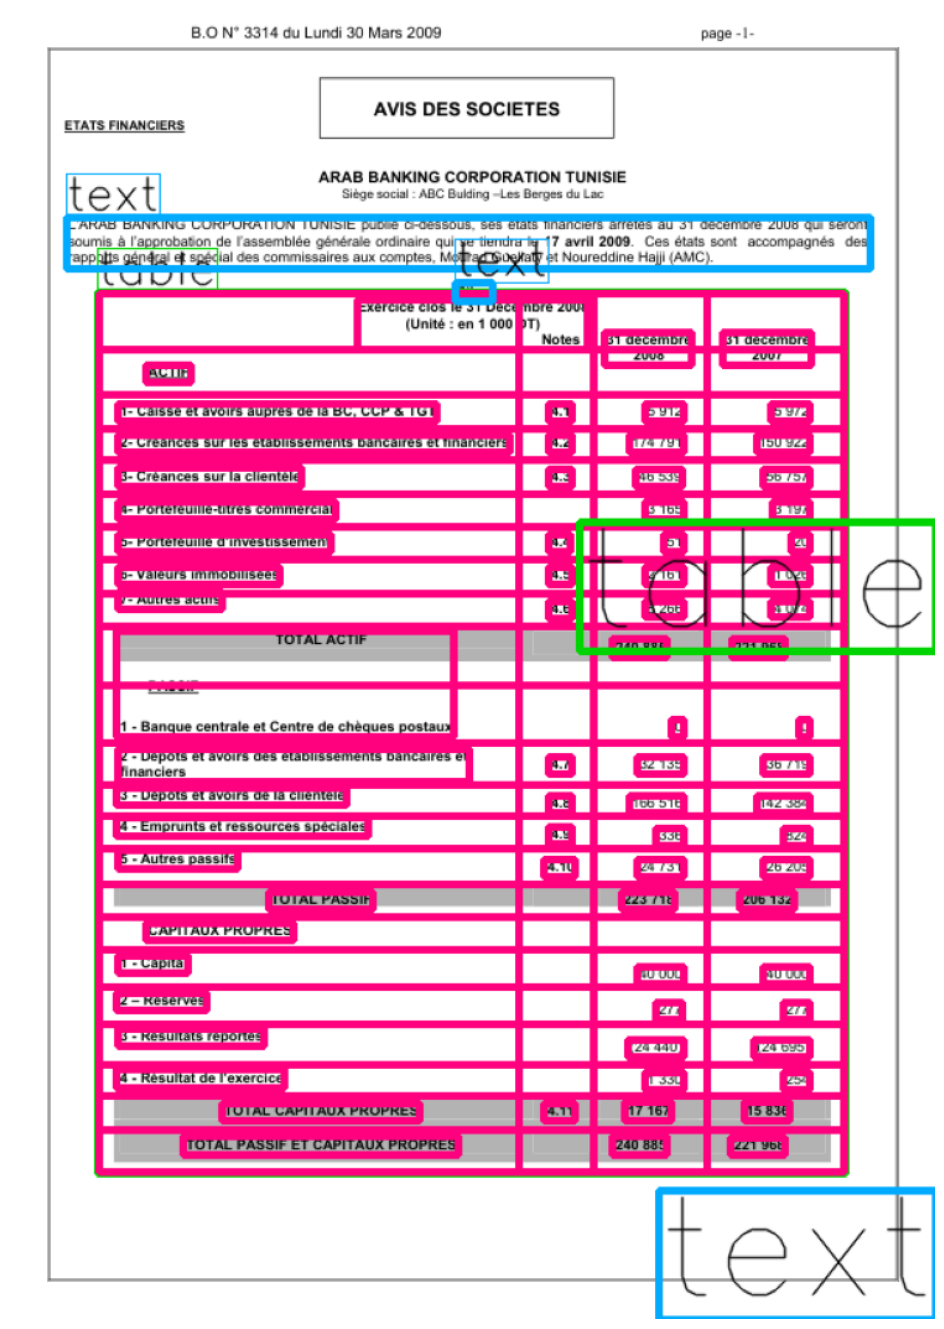

In [10]:
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [62]:
table = page.tables[0]
table.get_attribute_names()

{'bbox',
 'cells',
 'columns',
 'csv',
 <TableType.html>,
 <TableType.item>,
 <TableType.max_col_span>,
 <TableType.max_row_span>,
 'np_image',
 <TableType.number_of_columns>,
 <TableType.number_of_rows>,
 <Relationships.reading_order>,
 'rows',
 'text',
 'words'}

In [20]:
print(f" number of rows: {table.number_of_rows} \n number of columns: {table.number_of_columns} \n reading order: {table.reading_order}")


 number of rows: 22 
 number of columns: 3 
 reading order: None


In [21]:
html_content = HTML(page.tables[0].html)


In [22]:
html_content

In [29]:
tables = pd.read_html(page.tables[0].html)

C:\Users\kortb\AppData\Local\Temp\ipykernel_22712\89399063.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(page.tables[0].html)


In [30]:
for table in tables:
    print(table, '\n\n')

                                                    0                                                  1                   2
0                         Zone Industrielle Ben Arous                                                NaN                 NaN
1       ETAT DE RESULTAT CONSOLIDE (Exprimé en dinar)                                                NaN                 NaN
2                             PRODUITS D'EXPLOITATION                                 2022 Au 31/12/2022  2021 Au 31/12/2021
3   Revenus R.1 129389807 Autres produits dexploit...  Revenus R.1 129389807 Autres produits dexploit...    124691042 84.171
4                    Total des produits dexploitation                                         129 454469          124 775213
5                              CHARGES D'EXPLOITATION                                                NaN                 NaN
6   Variation des stocks des produits finis et des...                                          -18383393            -2384771


In [31]:
for i, table in enumerate(tables, start=1):
    file_name = f'table_{i}.csv'
    table.to_csv(file_name)

In [32]:
file_name

'table_1.csv'

In [33]:
data = pd.read_csv("table_1.csv")
data

,Unnamed: 0,0,1,2
0,0,Zone Industrielle Ben Arous,NaN,NaN
1,1,ETAT DE RESULTAT CONSOLIDE (Exprimé en dinar),NaN,NaN
2,2,PRODUITS D'EXPLOITATION,2022 Au 31/12/2022,2021 Au 31/12/2021
3,3,Revenus R.1 129389807 Autres produits dexploit...,Revenus R.1 129389807 Autres produits dexploit...,124691042 84.171
4,4,Total des produits dexploitation,129 454469,124 775213
5,5,CHARGES D'EXPLOITATION,NaN,NaN
6,6,Variation des stocks des produits finis et des...,-18383393,-2384771
7,7,Achats dapprowisonnements consommés R.3 -70571319,Achats dapprowisonnements consommés R.3 -70571319,-84.791219
8,8,Charges de personnel R.4 -20661306,Charges de personnel R.4 -20661306,-21-986760
9,9,Dotations aux amortissements et prov R.5 -6906306,Dotations aux amortissements et prov R.5 -6906306,-3403.763


In [34]:
tables = pd.read_html(page.tables[0].html)

# Uncomment the following lines if you want to print the tables
# for table in tables:
#     print(table, '\n\n')

# Store tables in variables
table_variables = []
for i, table in enumerate(tables, start=1):
    table_variables.append(table)

C:\Users\kortb\AppData\Local\Temp\ipykernel_22712\259742353.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(page.tables[0].html)


In [35]:
table_variables

[                                                    0                                                  1                   2
 0                         Zone Industrielle Ben Arous                                                NaN                 NaN
 1       ETAT DE RESULTAT CONSOLIDE (Exprimé en dinar)                                                NaN                 NaN
 2                             PRODUITS D'EXPLOITATION                                 2022 Au 31/12/2022  2021 Au 31/12/2021
 3   Revenus R.1 129389807 Autres produits dexploit...  Revenus R.1 129389807 Autres produits dexploit...    124691042 84.171
 4                    Total des produits dexploitation                                         129 454469          124 775213
 5                              CHARGES D'EXPLOITATION                                                NaN                 NaN
 6   Variation des stocks des produits finis et des...                                          -18383393            -

In [ ]:
from pathlib import Path
from tkinter import filedialog

filename = filedialog.askopenfilename()
if filename:
    # Read and print the content (in bytes) of the file.
    print(Path(filename).read_bytes())
else:
    print("No file selected.")